In [120]:
# Load Seurat object and create pseudobulk for MOFA analysis

#############################################
# Prerequisites - Load Libraries

In [121]:
source('MS0_Libraries.r')

###############################################
# Preqrequisites Configurations & Parameters

In [122]:
data_path = '../data/current'

In [123]:
result_path = '../results/current'

In [124]:
data_path

[1] "../data/current"

In [125]:
libraries = c('L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10','L11', 'L12', 'L13', 'L14')

# Load Data 

## Load Seurat object

In [126]:
### Raw data counts
# Data was last modified in february, comes directly from B6 script where data from B3 script is loaded that was last modified in October
# contains raw count matrix filtered on only Singlets for all genes (~19.000)
# The aggregated dataset here is the input for the MOFA Version V29

In [127]:
###### Load the generated seurat objects

source_text = paste( data_path, '/analysis/B/B6_DE_Integrated_Singlet_processed_rna.h5seurat', sep = '')
print(source_text)
print(file.info(source_text)$mtime)
rna_seurat_data = LoadH5Seurat(source_text, assays = "RNA", quietly = TRUE )


[1] "../data/current/analysis/B/B6_DE_Integrated_Singlet_processed_rna.h5seurat"
[1] "2023-01-21 12:14:40 CET"


Validating h5Seurat file

Initializing RNA with data

Adding counts for RNA

Adding scale.data for RNA

Adding feature-level metadata for RNA

Adding command information

Adding cell-level metadata



In [128]:
rna_seurat_data_raw = rna_seurat_data

In [129]:
### Decide what to use as input

In [130]:
rna_seurat_data = rna_seurat_data
# Alternatives:
# rna_seurat_data_raw
# rna_seurat_data_mofa

In [131]:
### Further data checks

In [132]:
head(colSums(x = rna_seurat_data, slot = "counts") )  # raw count values from original matrix

AAACCCACATACAGGG-1-L1 AAACCCACATGACTTG-1-L1 AAACCCAGTCATCAGT-1-L1 
                 3947                  5870                  3888 
AAACCCAGTGGTAATA-1-L1 AAACCCATCATCACAG-1-L1 AAACCCATCGATGGAG-1-L1 
                 5094                 17310                  4839

In [133]:
# str(rna_seurat_data)

In [134]:
head(rna_seurat_data$nCount_HTO) # get a column of the observation matrix

AAACCCACATACAGGG-1-L1 AAACCCACATGACTTG-1-L1 AAACCCAGTCATCAGT-1-L1 
                 1574                   379                   421 
AAACCCAGTGGTAATA-1-L1 AAACCCATCATCACAG-1-L1 AAACCCATCGATGGAG-1-L1 
                  478                   851                   473

In [135]:
#head(rna_seurat_data$classification) # get a column of the observation matrix

In [136]:
colnames(rna_seurat_data[[]])

[1] "nCount_HTO"                         "B2_Scanorama_Singlet_cluster"      
 [3] "B2_Scanorama_Singlet_rb_mt_cluster" "cell_type_Scanorama"               
 [5] "cluster_cell_type_Scanorama"        "classification_measurement"        
 [7] "delta_ef_value_group_measurement"   "m_y"                               
 [9] "measurement_y"                      "delta_ef_value_group"              
[11] "delta_ef_value"                     "sample_y"                          
[13] "age"                                "sex"                               
[15] "m_x"                                "classification"                    
[17] "group_y"                            "measurement_x"                     
[19] "sample_x"                           "library"                           
[21] "id"                                 "read"                              
[23] "pattern"                            "sequence"                          
[25] "feature_type"                       "in_sample"                         
[27] "display_name"                       "group_x"

In [137]:
head(rna_seurat_data[[]])   # get complete observation matrix 

,nCount_HTO,B2_Scanorama_Singlet_cluster,B2_Scanorama_Singlet_rb_mt_cluster,cell_type_Scanorama,cluster_cell_type_Scanorama,classification_measurement,delta_ef_value_group_measurement,m_y,measurement_y,delta_ef_value_group,⋯,sample_x,library,id,read,pattern,sequence,feature_type,in_sample,display_name,group_x
,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>
AAACCCACATACAGGG-1-L1,1574,8,8,B-cell,8_B-cell,acs_w_o_infection_TP1,x_greater_1_TP1,"M9 (14,3)",TP1,x_greater_1,⋯,9.1,L1,HTO_B0259,R2,5PNNNNNNNNNN(BC),CAGTAGTCACGGTCA,Antibody Capture,1,9.1,TP1
AAACCCACATGACTTG-1-L1,379,9,9,Monocytes - CD16_FCGR3A,9_Monocytes - CD16_FCGR3A,acs_w_o_infection_TP1,x_greater_1_TP1,"M9 (14,3)",TP1,x_greater_1,⋯,9.1,L1,HTO_B0259,R2,5PNNNNNNNNNN(BC),CAGTAGTCACGGTCA,Antibody Capture,1,9.1,TP1
AAACCCAGTCATCAGT-1-L1,421,5,5,T-cell-CD4,5_T-cell-CD4,acs_w_o_infection_TP1,x_smaller_1_TP1,"M7 (0,75)",TP1,x_smaller_1,⋯,7.1,L1,HTO_B0257,R2,5PNNNNNNNNNN(BC),TGTCTTTCCTGCCAG,Antibody Capture,1,7.1,TP1
AAACCCAGTGGTAATA-1-L1,478,0,0,T-cell-CD4,0_T-cell-CD4,acs_w_o_infection_TP1,x_greater_1_TP1,"M9 (14,3)",TP1,x_greater_1,⋯,9.1,L1,HTO_B0259,R2,5PNNNNNNNNNN(BC),CAGTAGTCACGGTCA,Antibody Capture,1,9.1,TP1
AAACCCATCATCACAG-1-L1,851,16,16,Plasma Blast,16_Plasma Blast,acs_w_o_infection_TP1,x_greater_1_TP1,"M9 (14,3)",TP1,x_greater_1,⋯,9.1,L1,HTO_B0259,R2,5PNNNNNNNNNN(BC),CAGTAGTCACGGTCA,Antibody Capture,1,9.1,TP1
AAACCCATCGATGGAG-1-L1,473,0,0,T-cell-CD4,0_T-cell-CD4,acs_subacute_TP1,missing,missing,missing,missing,⋯,8.1,L1,HTO_B0258,R2,5PNNNNNNNNNN(BC),CTCCTCTGCAATTAC,Antibody Capture,1,8.1,TP1


In [138]:
dim(rna_seurat_data@assays$RNA@scale.data)

[1]   1392 148275

In [139]:
head(GetAssayData(rna_seurat_data, slot = "scale.data"))

,AAACCCACATACAGGG-1-L1,AAACCCACATGACTTG-1-L1,AAACCCAGTCATCAGT-1-L1,AAACCCAGTGGTAATA-1-L1,AAACCCATCATCACAG-1-L1,AAACCCATCGATGGAG-1-L1,AAACCCATCTTGCAGA-1-L1,AAACGAAAGAACTTCC-1-L1,AAACGAAAGGGTACGT-1-L1,AAACGAAAGGGTCTTT-1-L1,⋯,TTTGGTTTCTGTACAG-1-L14,TTTGTTGAGCTCCACG-1-L14,TTTGTTGAGTCAGCCC-1-L14,TTTGTTGCACAAATAG-1-L14,TTTGTTGCAGAGCCCT-1-L14,TTTGTTGCAGGTTCGC-1-L14,TTTGTTGGTACCTAGT-1-L14,TTTGTTGGTACGTTCA-1-L14,TTTGTTGGTGGACCAA-1-L14,TTTGTTGTCGAAGAAT-1-L14
HES4,-0.2458351,5.2755065,-0.1659243,-0.2529775,-0.64255089,-0.2226176,-0.1294657,-0.3032477,5.0691404,-0.2307047,⋯,-0.2238024,-0.2566660,-0.1094798,-0.2565409,-0.3618868,-0.3595781,-0.2898208,-0.2445270,-0.66771084,-0.2764359
ISG15,-0.5671435,-0.6356693,-0.6192396,-0.6269512,-0.38615820,-0.6335911,1.2474985,-0.5369599,0.4149888,-0.6072676,⋯,1.5472746,1.1737832,1.0967059,-0.7113699,-0.8093281,0.3909281,-0.7160870,-0.5755023,1.70855975,1.5406628
TNFRSF18,-0.2080559,-0.1850859,-0.2253351,3.7579303,-0.04953691,-0.2080265,-0.2338105,-0.1949285,-0.1594944,-0.2083495,⋯,-0.2039024,-0.1873443,-0.2356623,-0.1908602,-0.1516817,-0.1588946,-0.1810645,-0.2076000,-0.04253671,-0.2055351
TNFRSF4,-0.1991221,-0.2098920,-0.2507233,-0.2237158,-0.27779725,-0.2373614,-0.2715408,-0.1653312,-0.2340275,-0.2226019,⋯,-0.2544025,-0.2766939,-0.2958161,-0.2607138,-0.2681839,-0.2387677,-0.2511905,-0.2033674,-0.26873145,-0.1605054
AL645728.1,-0.2744859,-0.2990338,-0.2319598,-0.2744958,-0.44214112,-0.2591127,-0.2129115,-0.3046129,-0.3214925,-0.2646544,⋯,-0.2574319,-0.2692729,-0.2007998,-0.2712910,-0.3175532,2.2594626,-0.2874482,3.8196340,1.03018486,-0.2932183
MIB2,-0.3938878,-0.3809605,-0.4023549,2.0574462,-0.30458272,-0.3930661,2.5170703,-0.3873412,1.4148629,2.2514246,⋯,-0.3904268,-0.3808021,-0.4071151,1.6874684,1.2390401,-0.3658706,1.5971848,-0.3935464,0.71125776,-0.3933075


In [140]:
DefaultAssay(rna_seurat_data)

[1] "RNA"

In [141]:
#rna_seurat_data[['scaled_data']] = CreateAssayObject(data = GetAssayData(rna_seurat_data, slot = "scale.data"))

In [142]:
#rna_seurat_data <- SetAssayData(rna_seurat_data, slot = "scale.data", new.data = GetAssayData(rna_seurat_data, slot = "scale.data"))

In [143]:
#str(rna_seurat_data)

In [144]:
### Optional select which transformation to use

In [145]:
#DefaultAssay(rna_seurat_data) <- "RNA"

In [146]:
rna_seurat_data

An object of class Seurat 
19221 features across 148275 samples within 1 assay 
Active assay: RNA (19221 features, 0 variable features)

# Data Processing

## Subset data

In [147]:
dim(rna_seurat_data)

[1]  19221 148275

In [148]:
rna_seurat_data_subset = rna_seurat_data

In [149]:
### Speed up tests
#rna_seurat_data_subset = rna_seurat_data_subset[1:100]

In [150]:
#rna_seurat_data_subset = rna_seurat_data_subset[,rna_seurat_data$cluster_cell_type_Scanorama %in% '0_T-cell-CD4']

In [151]:
dim(rna_seurat_data_subset)

[1]  19221 148275

## Define columns for aggregation to pseudobulk + data type conversions

In [152]:
sample_column = 'display_name' # to be sample-id

In [153]:
cluster_column =  'cluster_cell_type_Scanorama' # to be cluster_id
#cluster_column = 'cell_type_Scanorama' # alternative use cell-types instead of clusters

In [154]:
obs = rna_seurat_data_subset@meta.data

In [155]:
obs$cell = rownames(obs)

In [156]:
head(obs)

,nCount_HTO,B2_Scanorama_Singlet_cluster,B2_Scanorama_Singlet_rb_mt_cluster,cell_type_Scanorama,cluster_cell_type_Scanorama,classification_measurement,delta_ef_value_group_measurement,m_y,measurement_y,delta_ef_value_group,⋯,library,id,read,pattern,sequence,feature_type,in_sample,display_name,group_x,cell
,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<chr>
AAACCCACATACAGGG-1-L1,1574,8,8,B-cell,8_B-cell,acs_w_o_infection_TP1,x_greater_1_TP1,"M9 (14,3)",TP1,x_greater_1,⋯,L1,HTO_B0259,R2,5PNNNNNNNNNN(BC),CAGTAGTCACGGTCA,Antibody Capture,1,9.1,TP1,AAACCCACATACAGGG-1-L1
AAACCCACATGACTTG-1-L1,379,9,9,Monocytes - CD16_FCGR3A,9_Monocytes - CD16_FCGR3A,acs_w_o_infection_TP1,x_greater_1_TP1,"M9 (14,3)",TP1,x_greater_1,⋯,L1,HTO_B0259,R2,5PNNNNNNNNNN(BC),CAGTAGTCACGGTCA,Antibody Capture,1,9.1,TP1,AAACCCACATGACTTG-1-L1
AAACCCAGTCATCAGT-1-L1,421,5,5,T-cell-CD4,5_T-cell-CD4,acs_w_o_infection_TP1,x_smaller_1_TP1,"M7 (0,75)",TP1,x_smaller_1,⋯,L1,HTO_B0257,R2,5PNNNNNNNNNN(BC),TGTCTTTCCTGCCAG,Antibody Capture,1,7.1,TP1,AAACCCAGTCATCAGT-1-L1
AAACCCAGTGGTAATA-1-L1,478,0,0,T-cell-CD4,0_T-cell-CD4,acs_w_o_infection_TP1,x_greater_1_TP1,"M9 (14,3)",TP1,x_greater_1,⋯,L1,HTO_B0259,R2,5PNNNNNNNNNN(BC),CAGTAGTCACGGTCA,Antibody Capture,1,9.1,TP1,AAACCCAGTGGTAATA-1-L1
AAACCCATCATCACAG-1-L1,851,16,16,Plasma Blast,16_Plasma Blast,acs_w_o_infection_TP1,x_greater_1_TP1,"M9 (14,3)",TP1,x_greater_1,⋯,L1,HTO_B0259,R2,5PNNNNNNNNNN(BC),CAGTAGTCACGGTCA,Antibody Capture,1,9.1,TP1,AAACCCATCATCACAG-1-L1
AAACCCATCGATGGAG-1-L1,473,0,0,T-cell-CD4,0_T-cell-CD4,acs_subacute_TP1,missing,missing,missing,missing,⋯,L1,HTO_B0258,R2,5PNNNNNNNNNN(BC),CTCCTCTGCAATTAC,Antibody Capture,1,8.1,TP1,AAACCCATCGATGGAG-1-L1


In [157]:
head(obs[order(obs$cell),])

,nCount_HTO,B2_Scanorama_Singlet_cluster,B2_Scanorama_Singlet_rb_mt_cluster,cell_type_Scanorama,cluster_cell_type_Scanorama,classification_measurement,delta_ef_value_group_measurement,m_y,measurement_y,delta_ef_value_group,⋯,library,id,read,pattern,sequence,feature_type,in_sample,display_name,group_x,cell
,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<chr>
AAACCCAAGAAGGGAT-1-L10,261,2,2,T-cell-CD4,2_T-cell-CD4,acs_w_o_infection_TP4,x_smaller_0_TP4,"M3 (-0,06)",TP4,x_smaller_0,⋯,L10,HTO_B0252,R2,5PNNNNNNNNNN(BC),TGATGGCCTATTGGG,Antibody Capture,1,3.4,TP4,AAACCCAAGAAGGGAT-1-L10
AAACCCAAGACAGCGT-1-L4,1410,3,3,NK,3_NK,acs_w_o_infection_TP2,x_greater_1_TP2,"M2 (1,15)",TP2,x_greater_1,⋯,L4,HTO_B0252,R2,5PNNNNNNNNNN(BC),TGATGGCCTATTGGG,Antibody Capture,1,2.2,TP2,AAACCCAAGACAGCGT-1-L4
AAACCCAAGACATAAC-1-L3,469,5,5,T-cell-CD4,5_T-cell-CD4,acs_w_o_infection_TP1,x_smaller_1_TP1,"M25 (0,69)",TP1,x_smaller_1,⋯,L3,HTO_B0255,R2,5PNNNNNNNNNN(BC),AAGTATCGTTTCGCA,Antibody Capture,1,25.1,TP1,AAACCCAAGACATAAC-1-L3
AAACCCAAGACCATTC-1-L9,1104,5,5,T-cell-CD4,5_T-cell-CD4,koronarsklerose_TP0,missing,missing,missing,missing,⋯,L9,HTO_B0256,R2,5PNNNNNNNNNN(BC),GGTTGCCAGATGTCA,Antibody Capture,1,33,No-CCS,AAACCCAAGACCATTC-1-L9
AAACCCAAGACTGGGT-1-L2,355,0,0,T-cell-CD4,0_T-cell-CD4,acs_w_o_infection_TP1,x_smaller_0_TP1,"M13 (-2,2)",TP1,x_smaller_0,⋯,L2,HTO_B0253,R2,5PNNNNNNNNNN(BC),TTCCGCCTCTCTTTG,Antibody Capture,1,13.1,TP1,AAACCCAAGACTGGGT-1-L2
AAACCCAAGACTTAAG-1-L7,302,1,1,T-cell-CD8,1_T-cell-CD8,acs_w_o_infection_TP3,x_smaller_0_TP3,"M3 (-0,06)",TP3,x_smaller_0,⋯,L7,HTO_B0253,R2,5PNNNNNNNNNN(BC),TTCCGCCTCTCTTTG,Antibody Capture,1,3.3,TP3,AAACCCAAGACTTAAG-1-L7


In [158]:
colnames(obs)

[1] "nCount_HTO"                         "B2_Scanorama_Singlet_cluster"      
 [3] "B2_Scanorama_Singlet_rb_mt_cluster" "cell_type_Scanorama"               
 [5] "cluster_cell_type_Scanorama"        "classification_measurement"        
 [7] "delta_ef_value_group_measurement"   "m_y"                               
 [9] "measurement_y"                      "delta_ef_value_group"              
[11] "delta_ef_value"                     "sample_y"                          
[13] "age"                                "sex"                               
[15] "m_x"                                "classification"                    
[17] "group_y"                            "measurement_x"                     
[19] "sample_x"                           "library"                           
[21] "id"                                 "read"                              
[23] "pattern"                            "sequence"                          
[25] "feature_type"                       "in_sample"                         
[27] "display_name"                       "group_x"                           
[29] "cell"

In [159]:
obs$library = as.character(obs$library)

In [160]:
obs$group_id = as.character(obs[['in_sample']]) ## group-id neede in DE analysis, here not --> DUMMY Variable

In [161]:
obs$sample_id   = paste0(as.character(obs[[sample_column]] ), '-', obs$library)

In [162]:
obs$cluster_id = as.character(obs[[cluster_column]])

In [163]:
rownames(obs) = obs$cell

In [164]:
head(obs)

,nCount_HTO,B2_Scanorama_Singlet_cluster,B2_Scanorama_Singlet_rb_mt_cluster,cell_type_Scanorama,cluster_cell_type_Scanorama,classification_measurement,delta_ef_value_group_measurement,m_y,measurement_y,delta_ef_value_group,⋯,pattern,sequence,feature_type,in_sample,display_name,group_x,cell,group_id,sample_id,cluster_id
,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>
AAACCCACATACAGGG-1-L1,1574,8,8,B-cell,8_B-cell,acs_w_o_infection_TP1,x_greater_1_TP1,"M9 (14,3)",TP1,x_greater_1,⋯,5PNNNNNNNNNN(BC),CAGTAGTCACGGTCA,Antibody Capture,1,9.1,TP1,AAACCCACATACAGGG-1-L1,1,9.1-L1,8_B-cell
AAACCCACATGACTTG-1-L1,379,9,9,Monocytes - CD16_FCGR3A,9_Monocytes - CD16_FCGR3A,acs_w_o_infection_TP1,x_greater_1_TP1,"M9 (14,3)",TP1,x_greater_1,⋯,5PNNNNNNNNNN(BC),CAGTAGTCACGGTCA,Antibody Capture,1,9.1,TP1,AAACCCACATGACTTG-1-L1,1,9.1-L1,9_Monocytes - CD16_FCGR3A
AAACCCAGTCATCAGT-1-L1,421,5,5,T-cell-CD4,5_T-cell-CD4,acs_w_o_infection_TP1,x_smaller_1_TP1,"M7 (0,75)",TP1,x_smaller_1,⋯,5PNNNNNNNNNN(BC),TGTCTTTCCTGCCAG,Antibody Capture,1,7.1,TP1,AAACCCAGTCATCAGT-1-L1,1,7.1-L1,5_T-cell-CD4
AAACCCAGTGGTAATA-1-L1,478,0,0,T-cell-CD4,0_T-cell-CD4,acs_w_o_infection_TP1,x_greater_1_TP1,"M9 (14,3)",TP1,x_greater_1,⋯,5PNNNNNNNNNN(BC),CAGTAGTCACGGTCA,Antibody Capture,1,9.1,TP1,AAACCCAGTGGTAATA-1-L1,1,9.1-L1,0_T-cell-CD4
AAACCCATCATCACAG-1-L1,851,16,16,Plasma Blast,16_Plasma Blast,acs_w_o_infection_TP1,x_greater_1_TP1,"M9 (14,3)",TP1,x_greater_1,⋯,5PNNNNNNNNNN(BC),CAGTAGTCACGGTCA,Antibody Capture,1,9.1,TP1,AAACCCATCATCACAG-1-L1,1,9.1-L1,16_Plasma Blast
AAACCCATCGATGGAG-1-L1,473,0,0,T-cell-CD4,0_T-cell-CD4,acs_subacute_TP1,missing,missing,missing,missing,⋯,5PNNNNNNNNNN(BC),CTCCTCTGCAATTAC,Antibody Capture,1,8.1,TP1,AAACCCATCGATGGAG-1-L1,1,8.1-L1,0_T-cell-CD4


In [165]:
colnames(obs)

[1] "nCount_HTO"                         "B2_Scanorama_Singlet_cluster"      
 [3] "B2_Scanorama_Singlet_rb_mt_cluster" "cell_type_Scanorama"               
 [5] "cluster_cell_type_Scanorama"        "classification_measurement"        
 [7] "delta_ef_value_group_measurement"   "m_y"                               
 [9] "measurement_y"                      "delta_ef_value_group"              
[11] "delta_ef_value"                     "sample_y"                          
[13] "age"                                "sex"                               
[15] "m_x"                                "classification"                    
[17] "group_y"                            "measurement_x"                     
[19] "sample_x"                           "library"                           
[21] "id"                                 "read"                              
[23] "pattern"                            "sequence"                          
[25] "feature_type"                       "in_sample"                         
[27] "display_name"                       "group_x"                           
[29] "cell"                               "group_id"                          
[31] "sample_id"                          "cluster_id"

In [166]:
## Adding

In [167]:
# obs[,'library', drop = FALSE]

In [168]:
rna_seurat_data_subset = AddMetaData(object = rna_seurat_data_subset, metadata = obs[,'library', drop = FALSE], col.name = 'library_char')

In [169]:
## group-id  ### OLD

In [170]:
rna_seurat_data_subset = AddMetaData(object = rna_seurat_data_subset, metadata = obs[,'group_id', drop = FALSE], col.name = 'group_id')

In [171]:
## cluster-id

In [172]:
rna_seurat_data_subset = AddMetaData(object = rna_seurat_data_subset, metadata = obs[,'cluster_id', drop = FALSE], col.name = 'cluster_id')

In [173]:
## sample-id

In [174]:
rna_seurat_data_subset = AddMetaData(object = rna_seurat_data_subset, metadata = obs[,'sample_id', drop = FALSE], col.name = 'sample_id')

In [175]:
head(rna_seurat_data_subset@meta.data)

,nCount_HTO,B2_Scanorama_Singlet_cluster,B2_Scanorama_Singlet_rb_mt_cluster,cell_type_Scanorama,cluster_cell_type_Scanorama,classification_measurement,delta_ef_value_group_measurement,m_y,measurement_y,delta_ef_value_group,⋯,pattern,sequence,feature_type,in_sample,display_name,group_x,library_char,group_id,cluster_id,sample_id
,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>
AAACCCACATACAGGG-1-L1,1574,8,8,B-cell,8_B-cell,acs_w_o_infection_TP1,x_greater_1_TP1,"M9 (14,3)",TP1,x_greater_1,⋯,5PNNNNNNNNNN(BC),CAGTAGTCACGGTCA,Antibody Capture,1,9.1,TP1,L1,1,8_B-cell,9.1-L1
AAACCCACATGACTTG-1-L1,379,9,9,Monocytes - CD16_FCGR3A,9_Monocytes - CD16_FCGR3A,acs_w_o_infection_TP1,x_greater_1_TP1,"M9 (14,3)",TP1,x_greater_1,⋯,5PNNNNNNNNNN(BC),CAGTAGTCACGGTCA,Antibody Capture,1,9.1,TP1,L1,1,9_Monocytes - CD16_FCGR3A,9.1-L1
AAACCCAGTCATCAGT-1-L1,421,5,5,T-cell-CD4,5_T-cell-CD4,acs_w_o_infection_TP1,x_smaller_1_TP1,"M7 (0,75)",TP1,x_smaller_1,⋯,5PNNNNNNNNNN(BC),TGTCTTTCCTGCCAG,Antibody Capture,1,7.1,TP1,L1,1,5_T-cell-CD4,7.1-L1
AAACCCAGTGGTAATA-1-L1,478,0,0,T-cell-CD4,0_T-cell-CD4,acs_w_o_infection_TP1,x_greater_1_TP1,"M9 (14,3)",TP1,x_greater_1,⋯,5PNNNNNNNNNN(BC),CAGTAGTCACGGTCA,Antibody Capture,1,9.1,TP1,L1,1,0_T-cell-CD4,9.1-L1
AAACCCATCATCACAG-1-L1,851,16,16,Plasma Blast,16_Plasma Blast,acs_w_o_infection_TP1,x_greater_1_TP1,"M9 (14,3)",TP1,x_greater_1,⋯,5PNNNNNNNNNN(BC),CAGTAGTCACGGTCA,Antibody Capture,1,9.1,TP1,L1,1,16_Plasma Blast,9.1-L1
AAACCCATCGATGGAG-1-L1,473,0,0,T-cell-CD4,0_T-cell-CD4,acs_subacute_TP1,missing,missing,missing,missing,⋯,5PNNNNNNNNNN(BC),CTCCTCTGCAATTAC,Antibody Capture,1,8.1,TP1,L1,1,0_T-cell-CD4,8.1-L1


In [176]:
## Short check whether merging worked fine

## Convert to SCE 

In [177]:
rna_sce = as.SingleCellExperiment(rna_seurat_data_subset)

In [178]:
rna_sce  # rows = genes; columns = cells

class: SingleCellExperiment 
dim: 19221 148275 
metadata(0):
assays(2): counts logcounts
rownames(19221): AL627309.1 AL627309.4 ... AC004556.1 AC240274.1
rowData names(0):
colnames(148275): AAACCCACATACAGGG-1-L1 AAACCCACATGACTTG-1-L1 ...
  TTTGTTGGTGGACCAA-1-L14 TTTGTTGTCGAAGAAT-1-L14
colData names(33): nCount_HTO B2_Scanorama_Singlet_cluster ...
  sample_id ident
reducedDimNames(0):
mainExpName: RNA
altExpNames(0):

In [179]:
### Check amount of cells per sample and cluster

In [180]:
colSums(table(rna_sce$cluster_id,rna_sce$cluster_id ))

0_T-cell-CD4               1_T-cell-CD8 
                     24806                      19754 
                 10_B-cell              11_T-cell-CD4 
                      2897                       2769 
12_Monocytes - CD16_FCGR3A               13_Dendritic 
                      1934                       1365 
                  14_Other            15_Plasma Blast 
                      1345                        782 
           16_Plasma Blast              17_Progenitor 
                       763                        330 
         18_Megakaryocytes               2_T-cell-CD4 
                        99                      19071 
                      3_NK         4_Monocytes - CD14 
                     15670                      14625 
              5_T-cell-CD4         6_Monocytes - CD14 
                     12514                      11202 
        7_Monocytes - CD14                   8_B-cell 
                      7836                       7399 
 9_Monocytes - CD16_FCGR3A 
                      3114

In [181]:
cells_per_sample_cluster = t(table(rna_sce$cluster_id, rna_sce$sample_id))

In [182]:
head(as.data.frame(cells_per_sample_cluster))

,Var1,Var2,Freq
,<fct>,<fct>,<int>
1,1.1-L1,0_T-cell-CD4,398
2,10-L11,0_T-cell-CD4,219
3,10.2-L4,0_T-cell-CD4,156
4,10.3-L9,0_T-cell-CD4,193
5,11-L13,0_T-cell-CD4,83
6,11.2-L5,0_T-cell-CD4,212


In [183]:
write.csv(cells_per_sample_cluster, paste0(result_path, '/C-Analysis/C1_Cell_Sample_Cluster_Distribution.csv'))

In [184]:
cells_per_sample_cluster = data.frame(cells_per_sample_cluster)

In [185]:
head(cells_per_sample_cluster)

,Var1,Var2,Freq
,<fct>,<fct>,<int>
1,1.1-L1,0_T-cell-CD4,398
2,10-L11,0_T-cell-CD4,219
3,10.2-L4,0_T-cell-CD4,156
4,10.3-L9,0_T-cell-CD4,193
5,11-L13,0_T-cell-CD4,83
6,11.2-L5,0_T-cell-CD4,212


In [186]:
cells_per_sample_cluster %>% group_by(Var2) %>% summarise(amount_cells = sum(Freq))

Var2,amount_cells
<fct>,<int>
0_T-cell-CD4,24806
1_T-cell-CD8,19754
10_B-cell,2897
11_T-cell-CD4,2769
12_Monocytes - CD16_FCGR3A,1934
13_Dendritic,1365
14_Other,1345
15_Plasma Blast,782
16_Plasma Blast,763


In [187]:
colnames(cells_per_sample_cluster) = c('Sample', 'Cluster_Cell_Type', 'amount_cells')

In [188]:
cells_per_sample_cluster$amount_cells_cat[(cells_per_sample_cluster$amount_cells <= 3)  ] = '0-3'

In [189]:
cells_per_sample_cluster$amount_cells_cat[(cells_per_sample_cluster$amount_cells <= 10)  & (cells_per_sample_cluster$amount_cells >3 )] = '3-10'

In [190]:
cells_per_sample_cluster$amount_cells_cat[(cells_per_sample_cluster$amount_cells <= 20)  & (cells_per_sample_cluster$amount_cells >10 )] = '10-20'

In [191]:
cells_per_sample_cluster$amount_cells_cat[(cells_per_sample_cluster$amount_cells <= 50)  & (cells_per_sample_cluster$amount_cells >20 )] = '20-50'

In [192]:
cells_per_sample_cluster$amount_cells_cat[(cells_per_sample_cluster$amount_cells > 50)  ] = '> 50'

In [193]:
sample_class = unique(obs[,c('classification', 'sample_id')])

In [194]:
cells_per_sample_cluster = merge(cells_per_sample_cluster, sample_class, by.x = 'Sample', by.y = 'sample_id')

In [195]:
head(cells_per_sample_cluster)

,Sample,Cluster_Cell_Type,amount_cells,amount_cells_cat,classification
,<fct>,<fct>,<int>,<chr>,<fct>
1,1.1-L1,0_T-cell-CD4,398,> 50,acs_subacute
2,1.1-L1,1_T-cell-CD8,156,> 50,acs_subacute
3,1.1-L1,10_B-cell,12,10-20,acs_subacute
4,1.1-L1,11_T-cell-CD4,39,20-50,acs_subacute
5,1.1-L1,18_Megakaryocytes,0,0-3,acs_subacute
6,1.1-L1,15_Plasma Blast,1,0-3,acs_subacute


In [196]:
cells_per_sample_cluster$cell_type = str_replace(cells_per_sample_cluster$Cluster_Cell_Type, '\\d.*_', '')

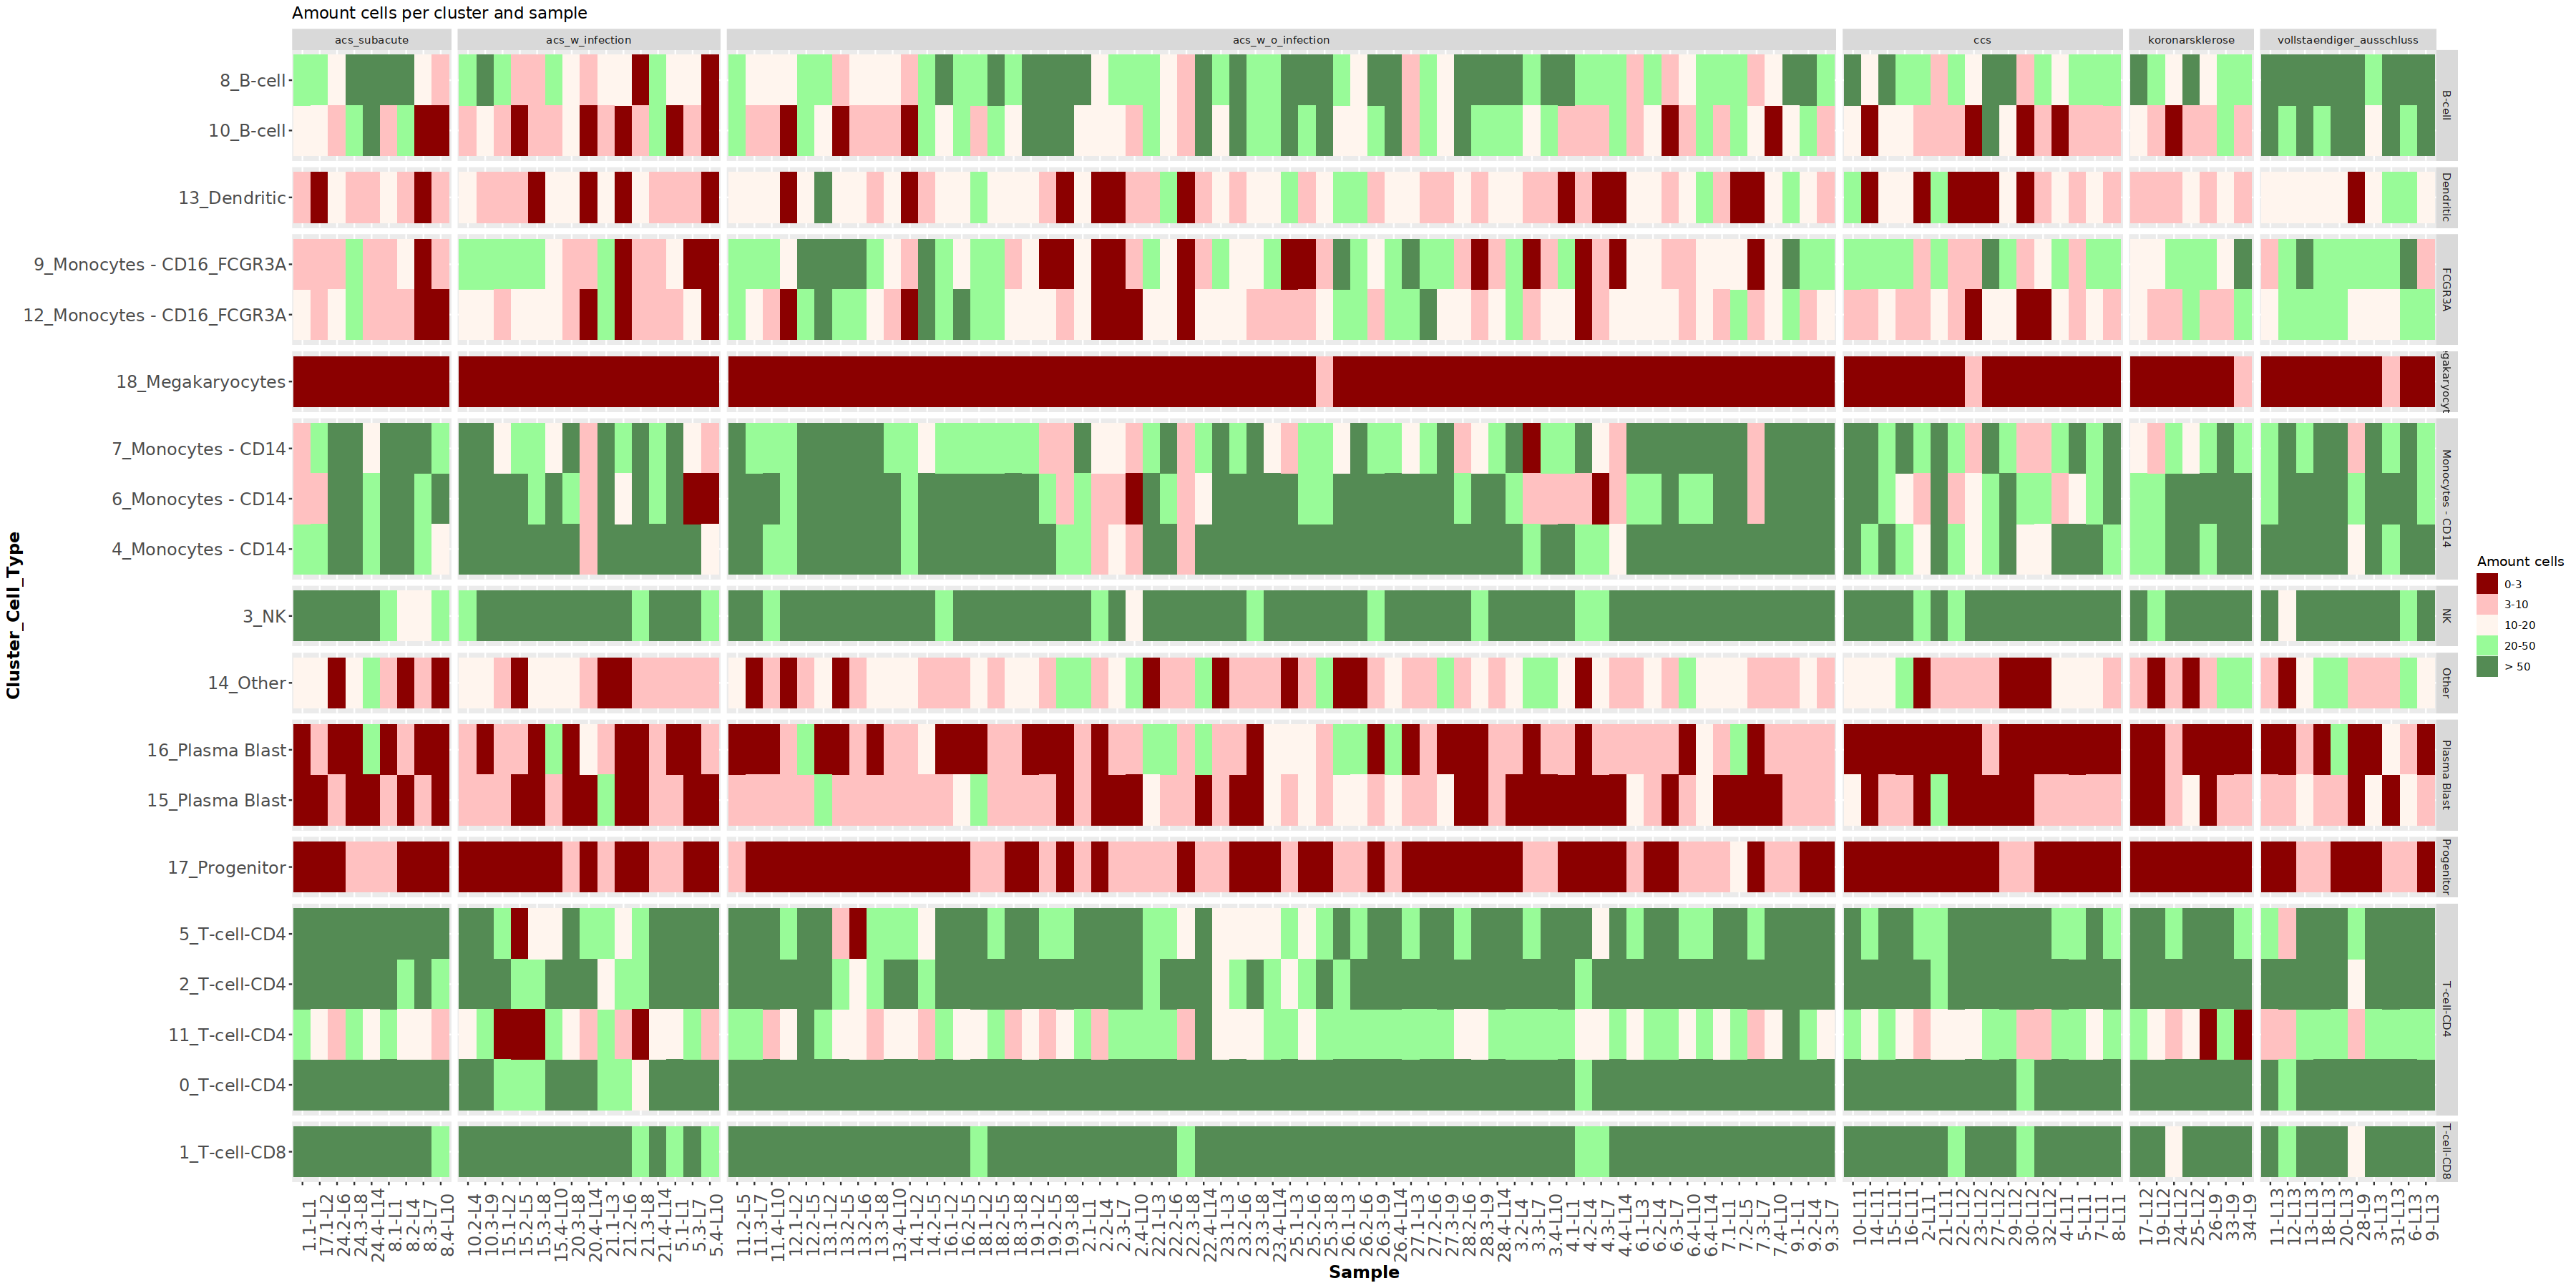

In [197]:
options(repr.plot.width=30, repr.plot.height=15)
g = ggplot(cells_per_sample_cluster, aes(Sample, Cluster_Cell_Type, fill= amount_cells_cat)) + facet_grid(cell_type ~ classification , scales = "free", space = "free") + geom_tile()   + ggtitle(label = "Amount cells per cluster and sample")+ theme(axis.text.x=element_text(size=14, angle = 90), axis.text.y=element_text(size=14, angle = 0),axis.title=element_text(size=14,face="bold")) + scale_fill_manual(name = "Amount cells", breaks=c( '0-3','3-10', 
                                 '10-20', '20-50', '> 50'), values =c("red4","rosybrown1",  "seashell", "palegreen", "palegreen4")) 
g

In [198]:
head(cells_per_sample_cluster,2)

,Sample,Cluster_Cell_Type,amount_cells,amount_cells_cat,classification,cell_type
,<fct>,<fct>,<int>,<chr>,<fct>,<chr>
1,1.1-L1,0_T-cell-CD4,398,> 50,acs_subacute,T-cell-CD4
2,1.1-L1,1_T-cell-CD8,156,> 50,acs_subacute,T-cell-CD8


## Analyze gene expression percentages per cluster

In [199]:
gene_list = list()

In [200]:
gene_cell_expr = list()

In [201]:
clusters = unique(rna_sce$cluster_cell_type_Scanorama)
#clusters = unique(rna_sce$cell_type_Scanorama)

In [202]:
clusters

[1] 8_B-cell                   9_Monocytes - CD16_FCGR3A 
 [3] 5_T-cell-CD4               0_T-cell-CD4              
 [5] 16_Plasma Blast            1_T-cell-CD8              
 [7] 6_Monocytes - CD14         2_T-cell-CD4              
 [9] 4_Monocytes - CD14         14_Other                  
[11] 11_T-cell-CD4              3_NK                      
[13] 7_Monocytes - CD14         13_Dendritic              
[15] 10_B-cell                  17_Progenitor             
[17] 12_Monocytes - CD16_FCGR3A 15_Plasma Blast           
[19] 18_Megakaryocytes         
20 Levels: 0_T-cell-CD4 1_T-cell-CD8 2_T-cell-CD4 3_NK ... missing

In [203]:
 for(i in clusters){
#    print(i)
    
    # subset data on cluster
    rna_sce_subset = rna_sce[,rna_sce$cluster_cell_type_Scanorama == i] # cluster
    # rna_sce_subset = rna_sce[,rna_sce$cell_type_Scanorama == i]  # cell-type
    
    amount_cells = dim(rna_sce_subset)[2]
    
    # Calculate percentage of cells expressing gene
    amount_cells_expressing_gene = rowSums(assay(rna_sce_subset) > 0 )
    perc_cells_expressing_gene = (amount_cells_expressing_gene/ amount_cells) * 100
    
#    hist(perc_cells_expressing_gene)
    
    gene_cell_expr[[i]] = data.frame(perc_cells_expressing_gene = perc_cells_expressing_gene, total_amount_cells_expressing_gene = amount_cells_expressing_gene)
    
    #gene_list[[i]] = names(perc_cells_expressing_gene[perc_cells_expressing_gene > subset_threshold])
    }

In [204]:
 ### Resulting amount of genes per cluster

In [205]:
#sort(unlist(lapply(gene_list, function(x){length(x)})))

In [206]:
gene_cell_expr_data = data.frame()

In [207]:
 head(gene_cell_expr[[i]])

,perc_cells_expressing_gene,total_amount_cells_expressing_gene
,<dbl>,<int>
AL627309.1,0.000000,0
AL627309.4,0.000000,0
AL669831.5,0.000000,0
FAM87B,0.000000,0
LINC00115,0.000000,0
FAM41C,3.030303,3


In [208]:
 names(gene_cell_expr[[i]])

[1] "perc_cells_expressing_gene"         "total_amount_cells_expressing_gene"

In [209]:
 for(i in names(gene_cell_expr)){
    data = gene_cell_expr[[i]]
    data$gene = rownames(gene_cell_expr[[i]])
    data$cluster = i
    gene_cell_expr_data = rbind( gene_cell_expr_data, data)
    }

In [210]:
head(gene_cell_expr_data,2)

,perc_cells_expressing_gene,total_amount_cells_expressing_gene,gene,cluster
,<dbl>,<int>,<chr>,<chr>
AL627309.1,0.24327612,18,AL627309.1,8_B-cell
AL627309.4,0.05406136,4,AL627309.4,8_B-cell


In [211]:
write.csv(gene_cell_expr_data, paste0(result_path, '/C-Analysis/C0_Filter_Genes_Input_Correlations_Perc_Values', '.csv'))

In [212]:
paste0(result_path, '/C-Analysis/C0_Filter_Genes_Input_Correlations_Perc_Values', '.csv')

[1] "../results/current/C-Analysis/C0_Filter_Genes_Input_Correlations_Perc_Values.csv"

## Add cluster, group and sample columns for aggregation

In [213]:
#### Add cluster_id, sample_id and group_id columns
(rna_sce <- prepSCE(rna_sce, 
    kid = 'cluster_id', # subpopulation assignments
    gid = 'group_id',  # group IDs (ctrl/stim)   # sample_id; using dummy sample id which corresponds to cluster columns
    sid = 'sample_id',   # sample IDs (ctrl/stim.1234)
    drop = FALSE))  # drop all other colData columns

class: SingleCellExperiment 
dim: 19221 148275 
metadata(1): experiment_info
assays(2): counts logcounts
rownames(19221): AL627309.1 AL627309.4 ... AC004556.1 AC240274.1
rowData names(0):
colnames(148275): AAACCCACATACAGGG-1-L1 AAACCCACATGACTTG-1-L1 ...
  TTTGTTGGTGGACCAA-1-L14 TTTGTTGTCGAAGAAT-1-L14
colData names(33): cluster_id sample_id ... library_char ident
reducedDimNames(0):
mainExpName: RNA
altExpNames(0):

In [214]:
nk <- length(kids <- levels(rna_sce$cluster_id))
ns <- length(sids <- levels(rna_sce$sample_id))
names(kids) <- kids; names(sids) <- sids

In [215]:
nk # amount of cluster

[1] 19

In [216]:
ns # amount of samples

[1] 121

In [217]:
kids  # cluster ids

0_T-cell-CD4                 1_T-cell-CD8 
              "0_T-cell-CD4"               "1_T-cell-CD8" 
                   10_B-cell                11_T-cell-CD4 
                 "10_B-cell"              "11_T-cell-CD4" 
  12_Monocytes - CD16_FCGR3A                 13_Dendritic 
"12_Monocytes - CD16_FCGR3A"               "13_Dendritic" 
                    14_Other              15_Plasma Blast 
                  "14_Other"            "15_Plasma Blast" 
             16_Plasma Blast                17_Progenitor 
           "16_Plasma Blast"              "17_Progenitor" 
           18_Megakaryocytes                 2_T-cell-CD4 
         "18_Megakaryocytes"               "2_T-cell-CD4" 
                        3_NK           4_Monocytes - CD14 
                      "3_NK"         "4_Monocytes - CD14" 
                5_T-cell-CD4           6_Monocytes - CD14 
              "5_T-cell-CD4"         "6_Monocytes - CD14" 
          7_Monocytes - CD14                     8_B-cell 
        "7_Monocytes - CD14"                   "8_B-cell" 
   9_Monocytes - CD16_FCGR3A 
 "9_Monocytes - CD16_FCGR3A"

In [218]:
length(kids) # amount cluster-id

[1] 19

In [219]:
sids   # sample ids

1.1-L1     10-L11    10.2-L4    10.3-L9     11-L13    11.2-L5    11.3-L7 
  "1.1-L1"   "10-L11"  "10.2-L4"  "10.3-L9"   "11-L13"  "11.2-L5"  "11.3-L7" 
  11.4-L10     12-L13    12.1-L2    12.2-L5     13-L13    13.1-L2    13.2-L5 
"11.4-L10"   "12-L13"  "12.1-L2"  "12.2-L5"   "13-L13"  "13.1-L2"  "13.2-L5" 
   13.2-L6    13.3-L8   13.4-L10     14-L11    14.1-L2    14.2-L5     15-L11 
 "13.2-L6"  "13.3-L8" "13.4-L10"   "14-L11"  "14.1-L2"  "14.2-L5"   "15-L11" 
   15.1-L2    15.2-L5    15.3-L8   15.4-L10     16-L11    16.1-L2    16.2-L5 
 "15.1-L2"  "15.2-L5"  "15.3-L8" "15.4-L10"   "16-L11"  "16.1-L2"  "16.2-L5" 
    17-L12    17.1-L2     18-L13    18.1-L2    18.2-L5    18.3-L8     19-L12 
  "17-L12"  "17.1-L2"   "18-L13"  "18.1-L2"  "18.2-L5"  "18.3-L8"   "19-L12" 
   19.1-L2    19.2-L5    19.3-L8      2-L11     2.1-L1     2.2-L4     2.3-L7 
 "19.1-L2"  "19.2-L5"  "19.3-L8"    "2-L11"   "2.1-L1"   "2.2-L4"   "2.3-L7" 
   2.4-L10     20-L13    20.3-L8   20.4-L14     21-L11    21.1-L3    21.2-L6 
 "2.4-L10"   "20-L13"  "20.3-L8" "20.4-L14"   "21-L11"  "21.1-L3"  "21.2-L6" 
   21.3-L8   21.4-L14     22-L12    22.1-L3    22.2-L6    22.3-L8   22.4-L14 
 "21.3-L8" "21.4-L14"   "22-L12"  "22.1-L3"  "22.2-L6"  "22.3-L8" "22.4-L14" 
    23-L12    23.1-L3    23.2-L6    23.3-L8   23.4-L14     24-L12    24.2-L6 
  "23-L12"  "23.1-L3"  "23.2-L6"  "23.3-L8" "23.4-L14"   "24-L12"  "24.2-L6" 
   24.3-L8   24.4-L14     25-L12    25.1-L3    25.2-L6    25.3-L8      26-L9 
 "24.3-L8" "24.4-L14"   "25-L12"  "25.1-L3"  "25.2-L6"  "25.3-L8"    "26-L9" 
   26.1-L3    26.2-L6    26.3-L9   26.4-L14     27-L12    27.1-L3    27.2-L6 
 "26.1-L3"  "26.2-L6"  "26.3-L9" "26.4-L14"   "27-L12"  "27.1-L3"  "27.2-L6" 
   27.3-L9      28-L9    28.2-L6    28.3-L9   28.4-L14     29-L12      3-L13 
 "27.3-L9"    "28-L9"  "28.2-L6"  "28.3-L9" "28.4-L14"   "29-L12"    "3-L13" 
    3.2-L4     3.3-L7    3.4-L10     30-L12     31-L13     32-L12      33-L9 
  "3.2-L4"   "3.3-L7"  "3.4-L10"   "30-L12"   "31-L13"   "32-L12"    "33-L9" 
     34-L9      4-L11     4.1-L1     4.2-L4     4.3-L7    4.4-L14      5-L11 
   "34-L9"    "4-L11"   "4.1-L1"   "4.2-L4"   "4.3-L7"  "4.4-L14"    "5-L11" 
    5.1-L1     5.3-L7    5.4-L10      6-L13     6.1-L3     6.2-L4     6.3-L7 
  "5.1-L1"   "5.3-L7"  "5.4-L10"    "6-L13"   "6.1-L3"   "6.2-L4"   "6.3-L7" 
   6.4-L10    6.4-L14      7-L11     7.1-L1     7.2-L5     7.3-L7    7.4-L10 
 "6.4-L10"  "6.4-L14"    "7-L11"   "7.1-L1"   "7.2-L5"   "7.3-L7"  "7.4-L10" 
     8-L11     8.1-L1     8.2-L4     8.3-L7    8.4-L10      9-L13     9.1-L1 
   "8-L11"   "8.1-L1"   "8.2-L4"   "8.3-L7"  "8.4-L10"    "9-L13"   "9.1-L1" 
    9.2-L4     9.3-L7 
  "9.2-L4"   "9.3-L7"

In [220]:
names(colData(rna_sce))

[1] "cluster_id"                         "sample_id"                         
 [3] "group_id"                           "nCount_HTO"                        
 [5] "B2_Scanorama_Singlet_cluster"       "B2_Scanorama_Singlet_rb_mt_cluster"
 [7] "cell_type_Scanorama"                "cluster_cell_type_Scanorama"       
 [9] "classification_measurement"         "delta_ef_value_group_measurement"  
[11] "m_y"                                "measurement_y"                     
[13] "delta_ef_value_group"               "delta_ef_value"                    
[15] "sample_y"                           "age"                               
[17] "sex"                                "m_x"                               
[19] "classification"                     "group_y"                           
[21] "measurement_x"                      "sample_x"                          
[23] "library"                            "id"                                
[25] "read"                               "pattern"                           
[27] "sequence"                           "feature_type"                      
[29] "in_sample"                          "display_name"                      
[31] "group_x"                            "library_char"                      
[33] "ident"

## Aggregate single cell to pseudo-bulk data

In [221]:
### Needs to be executed when filtering conditions are changed!!

In [222]:
rna_sce

class: SingleCellExperiment 
dim: 19221 148275 
metadata(1): experiment_info
assays(2): counts logcounts
rownames(19221): AL627309.1 AL627309.4 ... AC004556.1 AC240274.1
rowData names(0):
colnames(148275): AAACCCACATACAGGG-1-L1 AAACCCACATGACTTG-1-L1 ...
  TTTGTTGGTGGACCAA-1-L14 TTTGTTGTCGAAGAAT-1-L14
colData names(33): cluster_id sample_id ... library_char ident
reducedDimNames(0):
mainExpName: RNA
altExpNames(0):

In [223]:
pb <- aggregateData(rna_sce,
    assay = "counts", fun = "mean",
    by = c("cluster_id", "sample_id"))
# one sheet per subpopulation

In [224]:
pb

class: SingleCellExperiment 
dim: 19221 121 
metadata(2): experiment_info agg_pars
assays(19): 0_T-cell-CD4 1_T-cell-CD8 ... 8_B-cell 9_Monocytes -
  CD16_FCGR3A
rownames(19221): AL627309.1 AL627309.4 ... AC004556.1 AC240274.1
rowData names(0):
colnames(121): 1.1-L1 10-L11 ... 9.2-L4 9.3-L7
colData names(26): group_id classification_measurement ... library_char
  ident
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [225]:
#names(colData(pb))

In [226]:
### Save aggregated data

In [227]:
source_text

[1] "../data/current/analysis/B/B6_DE_Integrated_Singlet_processed_rna.h5seurat"

In [228]:
save(  pb , file = paste0(result_path, '/C-Analysis/C0_aggregated_RNA_input_correlations_all.RDS'))

In [229]:
# save(  pb , file = paste0(result_path, '/C-Analysis/C0_aggregated_RNA_input_correlations_all_Scanorama_MOFA.RDS'))
# save(  pb , file = paste0(result_path, '/C-Analysis/C0_aggregated_RNA_input_correlations_all_Scanorama.RDS')) 
# save(  pb , file = paste0(result_path, '/C-Analysis/C0_aggregated_RNA_input_correlations_all_Scanorama_feb.RDS')) 
#save(  pb , file = paste0(result_path, '/C-Analysis/C0_aggregated_RNA_input_correlations_sum.RDS')) 
# save(  pb , file = paste0(result_path, '/C-Analysis/C0_aggregated_RNA_input_correlations_all_Scanorama_MOFA_knn_30.RDS')) 
# save(  pb , file = paste0(result_path, '/C-Analysis/C0_aggregated_RNA_input_correlations_all_Scanorama_MOFA_knn_10.RDS')) 
#save(  pb , file = paste0(result_path, '/C-Analysis/C0_aggregated_RNA_input_correlations_', cluster_column, '.RDS'))

In [230]:
head(rowSums(assay(pb, '0_T-cell-CD4')))

AL627309.1 AL627309.4 AL669831.5     FAM87B  LINC00115     FAM41C 
0.13504293 0.12041834 5.15396341 0.08123066 1.20562973 1.57305053

In [231]:
head(assay(pb, '0_T-cell-CD4'))

,1.1-L1,10-L11,10.2-L4,10.3-L9,11-L13,11.2-L5,11.3-L7,11.4-L10,12-L13,12.1-L2,⋯,7.4-L10,8-L11,8.1-L1,8.2-L4,8.3-L7,8.4-L10,9-L13,9.1-L1,9.2-L4,9.3-L7
AL627309.1,0.002512563,0.00000000,0.000000000,0.00000000,0.00000000,0.000000000,0.00000000,0.000000000,0.00,0.01075269,⋯,0.00000000,0.00000000,0.000000000,0.000000000,0.000000000,0.00000000,0.000000000,0.003676471,0.001152074,0.000000000
AL627309.4,0.000000000,0.00000000,0.006410256,0.00000000,0.00000000,0.004716981,0.00000000,0.000000000,0.00,0.00000000,⋯,0.00000000,0.00000000,0.003367003,0.000000000,0.000000000,0.00000000,0.002298851,0.000000000,0.003456221,0.000000000
AL669831.5,0.047738693,0.03652968,0.032051282,0.07772021,0.03614458,0.042452830,0.01652893,0.058823529,0.08,0.02150538,⋯,0.04629630,0.02020202,0.050505051,0.058091286,0.043650794,0.04081633,0.041379310,0.025735294,0.024193548,0.032258065
FAM87B,0.000000000,0.00000000,0.000000000,0.00000000,0.01204819,0.000000000,0.00000000,0.000000000,0.00,0.00000000,⋯,0.00000000,0.00000000,0.006734007,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000,0.000000000,0.002481390
LINC00115,0.015075377,0.00456621,0.000000000,0.01554404,0.03614458,0.009433962,0.00000000,0.008403361,0.00,0.02150538,⋯,0.03703704,0.00000000,0.003367003,0.008298755,0.003968254,0.00000000,0.004597701,0.009191176,0.008064516,0.000000000
FAM41C,0.017587940,0.01369863,0.019230769,0.03108808,0.02409639,0.000000000,0.00000000,0.000000000,0.00,0.00000000,⋯,0.00000000,0.02020202,0.026936027,0.020746888,0.007936508,0.01020408,0.009195402,0.012867647,0.005760369,0.009925558
